### Library Installations

In [6]:
# Library Installations

# !pip install pypyodbc
# !pip install numpy
# !pip install pandas


### Library Imports

In [7]:
# Imports

import pypyodbc as odbc # pip install pypyodbc
import numpy as np # pip install numpy
import pandas as pd # pip install pandas

### Preparing to Connect To Database

In [8]:
# Connect to database

DRIVER_NAME =   "SQL SERVER"
SERVER_NAME = "LAPTOP-KBAD6AQA\SQLEXPRESS"
DATABASE_NAME = 'Netflix'

connection_string = f"""
    DRIVER={{{DRIVER_NAME}}};
    SERVER={{{SERVER_NAME}}};
    DATABASE={{{DATABASE_NAME}}};
    Trust_Connection=yes;
"""


### Connecting To Database and Fetching Table 

In [25]:
try:
    # Establish a connection
    conn = odbc.connect(connection_string)

    # Create a cursor
    cursor = conn.cursor()

    # Example query
    query = "SELECT * FROM Streaming_Data"
    cursor.execute(query)

    # Fetch and print results
    rows = cursor.fetchall()

    # Convert tuples to numpy arrays
    arrays = [np.array(row) for row in rows]

    # Create a DataFrame from the arrays
    columns = ["User_ID", "Session_ID", "Device_ID", "Video_ID", "Duration_Watched_minutes","Genre", "Country", "Age", "Gender", "Subscription_Status", "Ratings", "Languages", "Device_Type", "Location", "Playback_Quality", "Interaction_Events"]
    df = pd.DataFrame(arrays, columns=columns)

    # Print the DataFrame
    print(df.head())

except odbc.Error as e:
    print(f"Error: {e}")

finally:
    # Close the connection
    if conn:
        conn.close()

                                User_ID                            Session_ID  \
0  eb4f9229-74df-45f6-baac-cf19241b8b30  cb2142a7-0750-49ed-b8ac-a975fe1ff69a   
1  661d4b59-4328-410a-901c-1e3b4c40c334  3bc0a662-b353-4015-8b0c-55ceb510d13a   
2  dd3fe9e9-ea82-4891-ab93-8a47c80e3251  bd545b4a-9f54-4e87-b9f8-15ae20b44f22   
3  a1b3365b-1d00-4ddf-bc43-02fc9c10c680  0441086d-c59e-478d-a496-5c5b995ecfdb   
4  338d3f91-5f1c-4590-8803-324901826406  0295f01d-7f15-4799-856c-90c688697ef8   

  Device_ID Video_ID Duration_Watched_minutes        Genre  \
0       232       11              90.04452533       Sci-Fi   
1       549       85              68.97347929       Comedy   
2       844       50              42.51134326       Comedy   
3       201       38              53.31666005  Documentary   
4       700       31              69.43778589       Action   

                            Country Age  Gender Subscription_Status Ratings  \
0                             Sudan  56  Female             P

### Cleaning DataFrame

In [10]:
# Cleaning the DataFrame

clean_df = df.iloc[:, 4:]
print(clean_df.head())

  Duration_Watched_minutes        Genre                           Country Age  \
0              90.04452533       Sci-Fi                             Sudan  56   
1              68.97347929       Comedy                              Cuba  52   
2              42.51134326       Comedy                             Japan  14   
3              53.31666005  Documentary  Lao People's Democratic Republic  36   
4              69.43778589       Action                        Bangladesh  31   

   Gender Subscription_Status Ratings Languages Device_Type          Location  \
0  Female             Premium       3   Spanish  Smartphone         Reedshire   
1    Male             Premium       3   Chinese     Desktop       Stevenhaven   
2  Female             Premium       3   Spanish      Tablet        Vaughntown   
3    Male             Premium       2   Spanish      Laptop  East Raymondbury   
4    Male             Premium       4    German      Laptop    Michaelchester   

  Playback_Quality Interac

Most popular genres:
Documentary    1065
Thriller       1050
Sci-Fi         1041
Comedy         1033
Action         1030
Name: Genre, dtype: int64


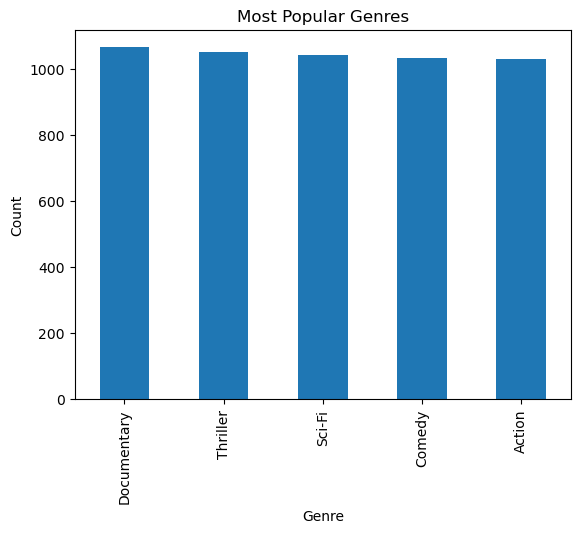

In [11]:
# Identifying the most popular genres

# Assuming 'Genre' is the column containing genre information
genre_counts = df['Genre'].value_counts()

# Print the most popular genres
print("Most popular genres:")
print(genre_counts.head())


import matplotlib.pyplot as plt

# Plot the most popular genres
genre_counts.head().plot(kind='bar')
plt.title('Most Popular Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()


In [49]:
# Convert 'Ratings' column to integers
df['Ratings'] = df['Ratings'].astype(int)

# Filter out rows with zero ratings
filtered_df = df[df['Ratings'] > 0]

# Group by 'Genre' and get the 'Ratings' for each group
genre_ratings = filtered_df.groupby('Genre')['Ratings'].mean().reset_index()

# Print the DataFrame with genres and their mean ratings
print(genre_ratings)

         Genre   Ratings
0       Action  3.041748
1       Comedy  3.013553
2  Documentary  2.928638
3        Drama  3.016080
4       Sci-Fi  2.962536
5     Thriller  2.965714


Genre: Action, Ratings: 3.041747572815534
Genre: Comedy, Ratings: 3.0135527589545013
Genre: Documentary, Ratings: 2.928638497652582
Genre: Drama, Ratings: 3.0160804020100502
Genre: Sci-Fi, Ratings: 2.962536023054755
Genre: Thriller, Ratings: 2.9657142857142857


Ideas

- Choose the most popular genre by the highest average watch time
- Choose the most popular genre by highest ratings 

NameError: name 'filtered_df' is not defined

In [24]:
print(df.Ratings)

0       3
1       3
2       3
3       2
4       4
       ..
6209    3
6210    4
6211    5
6212    5
6213    4
Name: Ratings, Length: 6214, dtype: object


In [13]:
# User demographics, analyze age, gender, and location to understand the audience profile.

In [14]:
# Analyzing the types of devices people use netflix with 

In [15]:
# Analyze the viewing duration, what is the average, what do people watch the most?

In [16]:
# Geographic Trends

# Explore user activity based on geographic location to identify regional content preferences or target specific regions for content promotions.

Ideas to Improve Code

Functions

Notes of What I have Learned

- Always know what are all the options that a column can have for a value
- Always know the data type that the values of the column you are working with are, ex. make sure numbers are not strings